# Assignment 3: Finding The Minimal Energy Configuration Of Charge Particle Within A Circle


_Authors: Sai Vinay Vardhan Daliparthi (15073815), Boyan Mihaylov (15067602), Nitai Nijholt (12709018)_

In [22]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from typing import List, Tuple
from itertools import product, combinations
import matplotlib.patches as patches
import random

import SaiVinayVardhanDaliparthi_15073815_BoyanMihaylov_15067602_NitaiNijholt_12709018_Assignment3 as ss3
from importlib import reload
reload(ss3)

<module 'SaiVinayVardhanDaliparthi_15073815_BoyanMihaylov_15067602_NitaiNijholt_12709018_Assignment3' from 'd:\\GitHub\\StochSim\\Assignment 3\\SaiVinayVardhanDaliparthi_15073815_BoyanMihaylov_15067602_NitaiNijholt_12709018_Assignment3.py'>

In [23]:
particles = [[0.1, 0.5], [0.124, 0.222], [1.22, 0.7], [0.99, 0.786]]

ss3.get_energy_forces_total(particles)

[(array([0.1, 0.5]), array([0.124, 0.222])), (array([0.1, 0.5]), array([1.22, 0.7 ])), (array([0.1, 0.5]), array([0.99 , 0.786])), (array([0.124, 0.222]), array([1.22, 0.7 ])), (array([0.124, 0.222]), array([0.99 , 0.786])), (array([1.22, 0.7 ]), array([0.99 , 0.786]))]
[((0, array([0.1, 0.5])), (1, array([0.124, 0.222]))), ((0, array([0.1, 0.5])), (2, array([1.22, 0.7 ]))), ((0, array([0.1, 0.5])), (3, array([0.99 , 0.786]))), ((1, array([0.124, 0.222])), (2, array([1.22, 0.7 ]))), ((1, array([0.124, 0.222])), (3, array([0.99 , 0.786]))), ((2, array([1.22, 0.7 ])), (3, array([0.99 , 0.786])))]
11.408862574159963


(array([5.53246525, 1.80394744, 4.07244989, 0.        ]),
 array([[ 0.        ,  0.        ],
        [-1.10468802, 12.79596952],
        [-1.40165379, -0.41542363],
        [13.66042313, -6.66957437]]))

Energy of between two patricles is given by:

$E_{i,j}=\dfrac{1}{|_{i,j}|}$


Force on 2 particles:


$\vec F_{i,j}=\frac{\vec r_{i,j}}{|r_{i,j}|^3}$


Source: Assignment 3 description

In [3]:
def get_force_2_particles(p_i, p_j, coulomb_constant=1):
    """
    Calculate the electrostatic force between two particles.

    Args:
        p_i (tuple): Position (x, y) of the first particle.
        p_j (tuple): Position (x, y) of the second particle.
        coulomb_constant (float, optional): Coulomb's constant, default is 1 for normalized calculations.

    Returns:
        numpy.ndarray: The vector representing the force exerted on the first particle by the second.
    """

    p_i, p_j = np.array(p_i), np.array(p_j)
    r_i_j = p_i - p_j
    dist_i_j = np.linalg.norm(r_i_j)
    
    # Avoid division by zero by imposing a minimum distance
    min_dist = 1e-10  # A small number to prevent division by zero
    dist_i_j = max(dist_i_j, min_dist)
    
    # Calculate the force vector using Coulomb's Law
    Force_i_j = coulomb_constant * r_i_j / (dist_i_j**3)

    return Force_i_j


def get_energy_2_particles(p_i, p_j, coulomb_constant=1):
    """
    Calculate the potential energy between two particles based on Coulomb's Law.

    The potential energy is inversely proportional to the distance between the particles.

    Args:
        p_i (tuple): Position (x, y) of the first particle.
        p_j (tuple): Position (x, y) of the second particle.
        coulomb_constant (float, optional): Coulomb's constant, default is 1 for normalized calculations.

    Returns:
        float: The scalar value of the potential energy between the two particles.
    """

    # Convert positions to numpy arrays for vectorized operations
    p_i, p_j = np.array(p_i), np.array(p_j)

    # Compute the Euclidean distance between particles
    dist_i_j = np.linalg.norm(p_i - p_j)

    # Calculate the potential energy using Coulomb's Law
    Energy_i_j = coulomb_constant / dist_i_j

    return Energy_i_j


The electrostatic potential energy $U_{\mathrm{E}}$ stored in a system of $N$ charges $q_1, q_2, \ldots, q_N$ at positions $\mathbf{r}_1, \mathbf{r}_2, \ldots, \mathbf{r}_N$ respectively, is:
$$
U_{\mathrm{E}}=\frac{1}{2} \sum_{i=1}^N q_i \Phi\left(\mathbf{r}i\right)=\frac{1}{2} k_e \sum{i=1}^N q_i \sum_{\substack{j=1 \\ j \neq i}}^N \frac{q_j}{r_{i j}}
$$


we assume $q{i} = q_{j} ... = q_{n} = 1$

In [4]:

def get_energy_total_system(list_of_particles):
    """
    Calculate the total potential energy of a system of particles.
    
    Args:
        list_of_particles (list or numpy.ndarray): A list of tuples or an n x 2 matrix representing the positions of n particles.

    Returns:
        float: The total potential energy of the system.
    """

    # Convert list of tuples to numpy array if it isn't already
    if not isinstance(list_of_particles, np.ndarray):
        list_of_particles = np.array([list(row) for row in list_of_particles])

    # Initialize list to store energies
    energies = []

    # Calculate energy between each unique pair of particles
    for p_i, p_j in combinations(list_of_particles, 2):
        energy_of_combi = get_energy_2_particles(p_i, p_j)
        energies.append(energy_of_combi)
    
    # Convert list of energies to numpy array and sum them to get total energy
    total_energy = np.sum(np.array(energies))

    return total_energy



def get_energy_all_particles(list_of_particles):
    """
    Calculate the potential energy on each particle by all other particles in the system.
    
    Args:
        list_of_particles (list or numpy.ndarray): A list of tuples or an n x 2 matrix representing the positions of n particles.

    Returns:
        numpy.ndarray: An array where each entry is the energy on one particle by all other particles.
    """

    # Convert list of tuples to numpy array if it isn't already
    if not isinstance(list_of_particles, np.ndarray):
        list_of_particles = np.array([list(row) for row in list_of_particles])

    # Initialize array to store energies for each particle
    energies = np.zeros(len(list_of_particles))

    # Calculate energy on each particle by all other particles
    for i, p_i in enumerate(list_of_particles):
        for j, p_j in enumerate(list_of_particles):
            if i != j:
                energy_of_combi = get_energy_2_particles(p_i, p_j)
                energies[i] += energy_of_combi

    return energies

def get_total_force_on_each_particle(list_of_particles, coulomb_constant=1):
    """
    Calculate the net force on each particle in a system.

    Args:
        list_of_particles (list or numpy.ndarray): A list of tuples or an n x 2 matrix representing the positions of n particles.
        coulomb_constant (float, optional): Coulomb's constant, default is 1 for normalized calculations.

    Returns:
        numpy.ndarray: An n x 2 matrix representing the net force vectors on each of the n particles.
    """
    # Convert list of tuples to numpy array if it isn't already
    if not isinstance(list_of_particles, np.ndarray):
        list_of_particles = np.array([list(row) for row in list_of_particles])

    # Initialize an array to store the net force on each particle
    net_forces = np.zeros_like(list_of_particles)  # Assuming 2D particles

    # Calculate net force on each particle
    for i, p_i in enumerate(list_of_particles):
        for j, p_j in enumerate(list_of_particles):
            if i != j:
                # Calculate force exerted on p_i by p_j
                force_ij = get_force_2_particles(p_i, p_j, coulomb_constant)
                net_forces[i] += force_ij
    return net_forces

In [5]:
p_i = (0,1)
p_j = (1,2)
force = get_force_2_particles(p_i,p_j)
print('force', force)

force [-0.35355339 -0.35355339]


In [6]:
def in_circle(position, radius):
    """Check if a position is within a circle of given radius centered at the origin."""
    position = np.array(position)
    x, y = position.T  # Transpose to separate x and y values
    return (x**2 + y**2) <= radius**2

In [7]:
def randomly_generate_initial_positions(n_particles, radius):
    positions = []
    while len(positions) < n_particles:
        x, y = np.random.uniform(-radius*2, radius*2, size=2)
        position = x,y
        if in_circle(position, radius):
            positions.append([x, y])
    positions = np.array(positions)
    return np.array(positions)

In [8]:
def randomly_generate_particle_matrix(n_particles, radius):
    # Generate initial positions
    positions = randomly_generate_initial_positions(n_particles, radius)
    
    # Calculate forces on each particle
    forces = get_total_force_on_each_particle(positions)

    # Calculate energies for each particle
    energies = get_energy_all_particles(positions)

    # Combine positions, forces, and energies into a single matrix
    particle_matrix = np.hstack((positions, forces, energies.reshape(-1, 1)))

    return particle_matrix

In [9]:
test_data = randomly_generate_particle_matrix(900, 2)
test_data[0]

array([ 1.35235697e+00, -1.62069353e-01,  2.79166442e+02, -3.71584963e+02,
        7.75377521e+02])

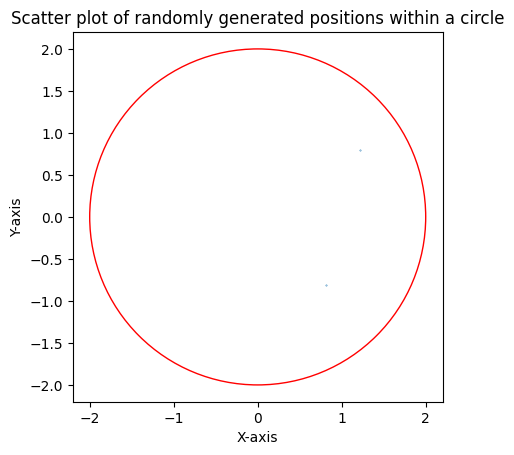

In [10]:
test_data = randomly_generate_initial_positions(900, 2)[:2]
x_coordinates = test_data[:, 0]  # Extract all x-coordinates
y_coordinates = test_data[:, 1]  # Extract all y-coordinates

# Create the figure and axis
fig, ax = plt.subplots()

# Scatter plot
ax.scatter(x_coordinates, y_coordinates, s=0.1)

# Create a circle patch with the same radius as used for the position generation
circle = patches.Circle((0, 0), 2, fill=False, edgecolor='r', linestyle='-')
ax.add_patch(circle)

# Set aspect of the plot to be equal, so the circle isn't skewed
ax.set_aspect('equal', adjustable='box')

# Setting labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter plot of randomly generated positions within a circle')

# Show the plot
plt.show()

In [11]:
def random_change_position_particles(particles, radius, movement_scaler=0.1):
    """Randomly increments x and y of each particle in a list."""
    updated_positions = []
    for particle in particles:
        delta_pos = np.random.uniform(-1, 1, size=(2,)) * movement_scaler * radius  # Use shape (2,) for delta_pos
        new_position = particle + delta_pos
        while not in_circle(new_position, radius):
            delta_pos = np.random.uniform(-1, 1, size=(2,)) * movement_scaler * radius
            new_position = particle + delta_pos
        updated_positions.append(new_position)
    return np.array(updated_positions)

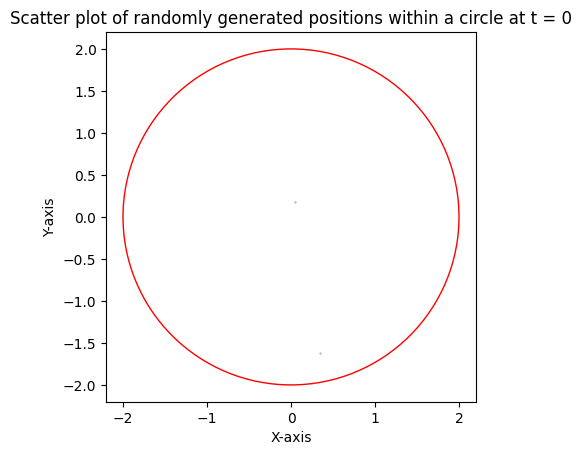

position particle 1 [ 0.34843878 -1.62111924]
Total System Energy 0.547013860992562
Total System Forcse [[ 0.05009005 -0.29500184]
 [-0.05009005  0.29500184]]


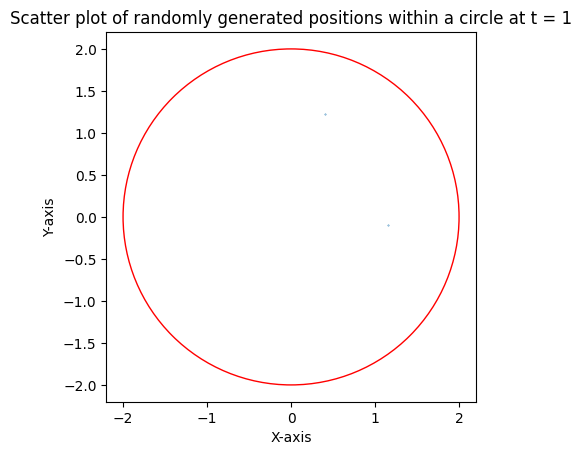

position particle 1 [ 1.149614   -0.09600632]
Total System Energy 0.6590133437592869
Total System Forcse [[ 0.21476005 -0.37748296]
 [-0.21476005  0.37748296]]


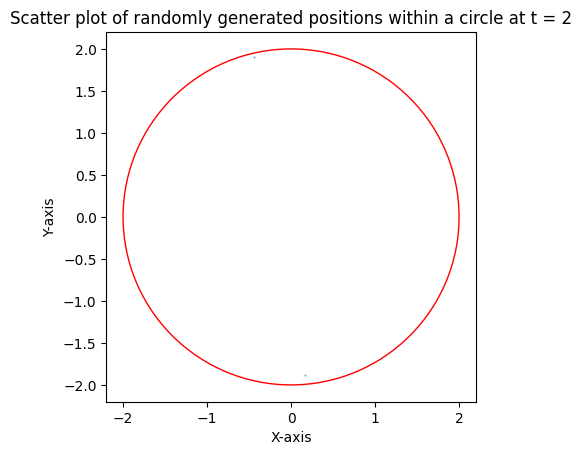

position particle 1 [-0.4428762   1.90435019]
Total System Energy 0.26055162634633694
Total System Forcse [[-0.01069618  0.06703922]
 [ 0.01069618 -0.06703922]]


In [12]:
test_data = randomly_generate_initial_positions(900, 2)[:2]
radius = 2
timesteps = 3
movement_scaler = 2
for t in range(timesteps):
    x_coordinates = test_data[:, 0]  # Extract all x-coordinates
    y_coordinates = test_data[:, 1]  # Extract all y-coordinates

    # Create the figure and axis
    fig, ax = plt.subplots()

    # Scatter plot
    ax.scatter(x_coordinates, y_coordinates, s=0.1)

    # Create a circle patch with the same radius as used for the position generation
    circle = patches.Circle((0, 0), 2, fill=False, edgecolor='r', linestyle='-')
    ax.add_patch(circle)

    # Set aspect of the plot to be equal, so the circle isn't skewed
    ax.set_aspect('equal', adjustable='box')

    # Setting labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(f'Scatter plot of randomly generated positions within a circle at t = {t}')

    # Show the plot
    plt.show()
    print('position particle 1', test_data[0])
    print('Total System Energy', get_energy_total_system(test_data))
    print('Total System Forcse', get_total_force_on_each_particle(test_data))
    test_data = random_change_position_particles(particles=test_data, radius=radius, movement_scaler=movement_scaler)

In [13]:
def logarithmic_decay_cooling(T_init, t, a, b):
    """https://canvas.uva.nl/courses/39303/pages/lecture-09-the-gibbs-sampler-and-simulated-annealing?module_item_id=1830823 slide 14"""
    T_n = a/(np.log(t+b))
    return T_n



def exponential_decay_cooling(T_init, t, a, b):
    return T_init * (a ** t)


In [14]:
T_init = 100

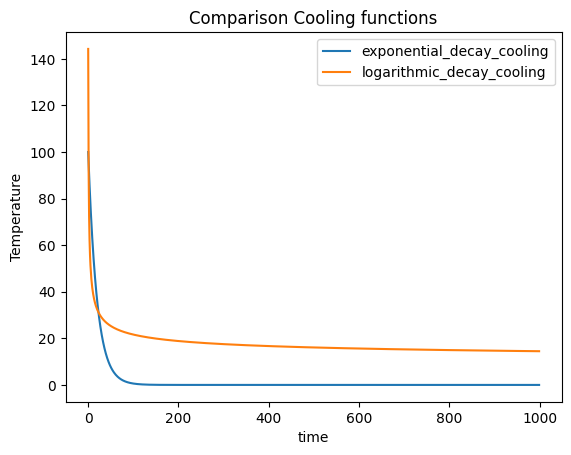

In [15]:
T_init = 100
temperatures_exp = [exponential_decay_cooling(T_init,t, a=0.95,b=4) for t in range(1000)]
temperatures_log = [logarithmic_decay_cooling(T_init,t, a=100,b=2) for t in range(1000)]

plt.title('Comparison Cooling functions')
plt.plot(temperatures_exp, label = 'exponential_decay_cooling')
plt.plot(temperatures_log, label = 'logarithmic_decay_cooling')
plt.legend()
plt.xlabel('time')
plt.ylabel('Temperature')
plt.show()

In [16]:
# def Simulated_Anealing_change_position_particles(particles, time_range, radius, movement_scaler=0.1, T_init=1, cooling_function=None, a=100  , b=1):
#     """
#     Perform simulated annealing to update particle positions within a specified radius.

#     This function moves each particle randomly within a circle of given radius, and evaluates the total energy of the system. 
#     If the total energy decreases, the new position is accepted. If not, the new position may still be accepted 
#     with a probability dependent on the current temperature. The temperature decreases over time using a cooling function.

#     Parameters:
#     - particles (list): Initial positions of particles.
#     - time_range (int): Number of iterations for the annealing process.
#     - radius (float): Radius within which particles can move.
#     - movement_scaler (float, optional): Scales the magnitude of particle movements. Default is 0.1.
#     - T_init (float, optional): Initial temperature for annealing. Default is 1.
#     - cooling_function (callable, optional): Function to reduce temperature over time. Must be provided.
#     - a, b (int, optional): Parameters for the cooling function. Default values are 10 and 2.

#     Returns:
#     - updated_positions (list): Final positions of particles after annealing.
#     - Total_Energy_over_time (numpy array): Total system energy at each timestep.
#     """
#     # Check if the cooling function is provided, raise error if not
#     if cooling_function is None:
#         raise ValueError("cooling_function must be provided")

#     # Initialize temperature and particle positions
#     T = T_init
#     particles = np.array(particles)
#     updated_positions = particles.copy()
#     test_positions = particles.copy()

#     # Calculate initial total energy of the system
#     Total_energy_old = get_energy_total_system(particles)
#     Total_Energy_over_time = np.zeros(time_range)

#     # Iterate over the given time range
#     for t in range(time_range):
#         # Update positions of each particle
#         for index, particle in enumerate(particles):
#             # Generate a new position for the particle
#             delta_pos = np.random.uniform(-1, 1, size=(2,)) * movement_scaler * radius
#             new_position = particle + delta_pos

#             # Ensure the new position is within the specified circle
#             while not in_circle(new_position, radius):
#                 delta_pos = np.random.uniform(-1, 1, size=(2,)) * movement_scaler * radius
#                 new_position = particle + delta_pos

#             test_positions[index] = new_position
#             Total_energy_new = get_energy_total_system(test_positions)

#             # Accept the new position if energy is reduced, else accept it probabilistically
#             if Total_energy_old > Total_energy_new:
#                 updated_positions[index] = new_position
#                 Total_energy_old = get_energy_total_system(updated_positions)
#             else:
#                 alpha = np.min([np.exp(-(Total_energy_new - Total_energy_old) / T), 1])
#                 if np.random.uniform() <= alpha:
#                     updated_positions[index] = new_position
#                     Total_energy_old = get_energy_total_system(updated_positions)
#                 else:
#                     updated_positions[index] = particles[index]

#             Total_Energy_over_time[t] = get_energy_total_system(updated_positions)

#         # Update the temperature using the cooling function
#         T = cooling_function(T_init, t, a, b)
#         print('timestep', t)
#     # Return the updated positions and energy over time
#     return updated_positions, Total_Energy_over_time


In [197]:
def move_particle_radial(particle, radius=2, movement_scaler=1, move_mode = 'random'):
    """Takes a particle which is a positional tuple of (x,y) and returns the new position of this particle"""
    if move_mode == 'random':
        max_radius = 2*radius
        x_old, y_old = particle
        current_theta = np.arctan2(y_old, x_old)
        change_theta = np.random.uniform(0,2*np.pi)
        theta_new = current_theta + change_theta
        current_r_of_particle = np.linalg.norm([x_old, y_old])
        # r_new = np.random.uniform(-current_r_of_particle, max_radius-current_r_of_particle)
        r_new = np.random.uniform(0, max_radius) * movement_scaler

        x_new = r_new*np.cos(theta_new)
        y_new =  r_new*np.sin(theta_new)


        position_new = np.array([x_new, y_new])
        return position_new
    
    if move_mode == 'incremental drop - off':
        max_radius = 2*radius
        x_old, y_old = particle
        current_theta = np.arctan2(y_old, x_old)
        change_theta = np.random.uniform(0,2*np.pi) * movement_scaler
        theta_new = current_theta + change_theta
        current_r_of_particle = np.linalg.norm([x_old, y_old])
        r_step = np.random.uniform(-current_r_of_particle, max_radius-current_r_of_particle) * movement_scaler
        r_new = current_r_of_particle + r_step
        x_new = r_new*np.cos(theta_new)
        y_new =  r_new*np.sin(theta_new)


        position_new = np.array([x_new, y_new])
        return position_new



In [198]:
def get_particle_to_move(particles_matrix):
    # Calculating the magnitudes of forces on each particle
    # Note: Using numpy's vectorized operations for faster computation
    squared_forces = particles_matrix[:, 3]**2 + particles_matrix[:, 4]**2
    magnitudes_of_forces_on_each_particle = np.sqrt(squared_forces)
    
    # Choosing a particle based on the magnitude of the force
    particle_to_move_index = random.choices(range(len(magnitudes_of_forces_on_each_particle)),
                                            weights=magnitudes_of_forces_on_each_particle, k=1)[0]
    return particle_to_move_index

In [258]:
def Simulated_Anealing_change_position_particles(particles_matrix, time_range, radius, T_init=1, cooling_function=None, a=100, b=1, movement_func=move_particle_radial, mode='normal', move_mode='random', movement_scaler=1):
    """
    Perform simulated annealing to update particle positions within a specified radius.

    This function moves each particle randomly within a circle of given radius, and evaluates the total energy of the system. 
    If the total energy decreases, the new position is accepted. If not, the new position may still be accepted 
    with a probability dependent on the current temperature. The temperature decreases over time using a cooling function.

    Parameters:
    - particles (list): Initial positions of particles.
    - time_range (int): Number of iterations for the annealing process.
    - radius (float): Radius within which particles can move.
    - movement_scaler (float, optional): Scales the magnitude of particle movements. Default is 0.1.
    - T_init (float, optional): Initial temperature for annealing. Default is 1.
    - cooling_function (callable, optional): Function to reduce temperature over time. Must be provided.
    - a, b (int, optional): Parameters for the cooling function. Default values are 10 and 2.

    Returns:
    - updated_positions (list): Final positions of particles after annealing.
    - Total_Energy_over_time (numpy array): Total system energy at each timestep.
    """
    
    
    if cooling_function is None:
        raise ValueError("cooling_function must be provided")
    
    

    T = T_init
    movement_scaler = movement_scaler
    positions = particles_matrix[:, :2]
    updated_positions = positions.copy()
    Total_energy_old = get_energy_total_system(positions)
    Total_Energy_over_time = np.zeros(time_range)

    for t in range(time_range):
        # Optionally decrease the movement scaler over time for 'incremental drop-off' mode
        if move_mode == 'incremental drop-off':
            # Example formula to decrease movement_scaler over time
            movement_scaler = movement_scaler / (1 + t / time_range)


        if mode == 'normal':
            for index, particle in enumerate(positions):
                old_positions = updated_positions.copy()
                Total_energy_old = get_energy_total_system(old_positions)

                # Generate a new position for the particle
                new_position = movement_func(particle, radius, movement_scaler, move_mode)

                # Ensure the new position is within the specified circle
                while not in_circle(new_position, radius):
                    new_position = movement_func(particle, radius, movement_scaler, move_mode)

                test_positions = old_positions.copy()
                test_positions[index] = new_position
                Total_energy_new = get_energy_total_system(test_positions)

                # Probabilistic acceptance of new position
                k = 1  # Boltzmann constant (normalized)
                alpha = np.min([np.exp(-(Total_energy_new - Total_energy_old) / (T * k)), 1])
                if (Total_energy_new < Total_energy_old) or (np.random.uniform() <= alpha):
                    updated_positions[index, :2] = new_position
                    if mode == 'force': # moot code, change the name of this if we want to save forces in normal mode
                        forces = get_total_force_on_each_particle(updated_positions)
                        energies = get_energy_all_particles(updated_positions)
                        particles_matrix[:, 2:] = np.hstack((forces, energies.reshape(-1, 1)))

            Total_Energy_over_time[t] = get_energy_total_system(updated_positions)
            T = cooling_function(T_init, t, a, b)
            print('timestep (t):', t )

        if mode == 'force':
            particle_index = get_particle_to_move(particles_matrix)
            particle = updated_positions[particle_index, :2]

            # print('particle_index',particle_index)
            # print('particle',particle)

            old_positions = updated_positions.copy()
            Total_energy_old = get_energy_total_system(old_positions)

            # Generate a new position for the particle
            new_position = movement_func(particle, radius, movement_scaler, move_mode)

            # Ensure the new position is within the specified circle
            while not in_circle(new_position, radius):
                new_position = movement_func(particle, radius, movement_scaler, move_mode)


            test_positions = old_positions.copy()
            test_positions[particle_index] = new_position
            Total_energy_new = get_energy_total_system(test_positions)

            # Probabilistic acceptance of new position
            k = 1  # Boltzmann constant (normalized)
            alpha = np.min([np.exp(-(Total_energy_new - Total_energy_old) / (T * k)), 1])
            if (Total_energy_new < Total_energy_old) or (np.random.uniform() <= alpha):
                print('found lower energy state', Total_energy_new)
            
                # print('updated_positions[particle_index, :2]', updated_positions[particle_index, :2])

                updated_positions[particle_index, :2] = new_position
                if mode == 'force':
                    forces = get_total_force_on_each_particle(updated_positions)
                    energies = get_energy_all_particles(updated_positions)
                    particles_matrix[:, 2:] = np.hstack((forces, energies.reshape(-1, 1)))

            particles_matrix[:, :2] = updated_positions


            Total_Energy_over_time[t] = get_energy_total_system(updated_positions)
            T = cooling_function(T_init, t, a, b)
            print('timestep (t):', t )


        if mode == 'random':
            particle_index = np.random.randint(particles_matrix.shape[0])
            particle = updated_positions[particle_index, :2]

            # print('particle_index',particle_index)
            # print('particle',particle)

            old_positions = updated_positions.copy()
            Total_energy_old = get_energy_total_system(old_positions)

            # Generate a new position for the particle
            new_position = movement_func(particle, radius, movement_scaler, move_mode)

            # Ensure the new position is within the specified circle
            while not in_circle(new_position, radius):
                new_position = movement_func(particle, radius, movement_scaler, move_mode)


            test_positions = old_positions.copy()
            test_positions[particle_index] = new_position
            Total_energy_new = get_energy_total_system(test_positions)

            # Probabilistic acceptance of new position
            k = 1  # Boltzmann constant (normalized)
            alpha = np.min([np.exp(-(Total_energy_new - Total_energy_old) / (T * k)), 1])
            if (Total_energy_new < Total_energy_old) or (np.random.uniform() <= alpha):
                print('found lower energy state', Total_energy_new)
            
                # print('updated_positions[particle_index, :2]', updated_positions[particle_index, :2])

                updated_positions[particle_index, :2] = new_position
                if mode == 'force':
                    forces = get_total_force_on_each_particle(updated_positions)
                    energies = get_energy_all_particles(updated_positions)
                    particles_matrix[:, 2:] = np.hstack((forces, energies.reshape(-1, 1)))

            particles_matrix[:, :2] = updated_positions


            Total_Energy_over_time[t] = get_energy_total_system(updated_positions)
            T = cooling_function(T_init, t, a, b)
            print('timestep (t):', t )



                
                
    particles_matrix[:, :2] = updated_positions

    return particles_matrix, Total_Energy_over_time

In [259]:
# params
n_particles = 12
radius = 2
test_data = randomly_generate_initial_positions(n_particles, radius)[:2]
movement_scaler = 1
time_range = 500
T_init= 100

In [260]:
test_data = randomly_generate_particle_matrix(n_particles, radius)
run_postions_result_normal, energy_over_time_data_normal = Simulated_Anealing_change_position_particles(test_data, radius=radius, movement_scaler=movement_scaler, time_range=time_range,cooling_function=exponential_decay_cooling, a=0.95,b=7, T_init=T_init, movement_func=move_particle_radial, mode = 'normal')
test_data = randomly_generate_particle_matrix(n_particles, radius)
run_postions_result_force, energy_over_time_data_force= Simulated_Anealing_change_position_particles(test_data, radius=radius, movement_scaler=movement_scaler, time_range=time_range,cooling_function=exponential_decay_cooling, a=0.95,b=7, T_init=T_init, movement_func=move_particle_radial, mode = 'force')
test_data = randomly_generate_particle_matrix(n_particles, radius)
run_postions_result_random, energy_over_time_data_random = Simulated_Anealing_change_position_particles(test_data, radius=radius, movement_scaler=movement_scaler, time_range=time_range,cooling_function=exponential_decay_cooling, a=0.95,b=7, T_init=T_init, movement_func=move_particle_radial, mode = 'random')

timestep (t): 0
timestep (t): 1
timestep (t): 2
timestep (t): 3
timestep (t): 4
timestep (t): 5
timestep (t): 6
timestep (t): 7
timestep (t): 8
timestep (t): 9
timestep (t): 10
timestep (t): 11
timestep (t): 12
timestep (t): 13
timestep (t): 14
timestep (t): 15
timestep (t): 16
timestep (t): 17
timestep (t): 18
timestep (t): 19
timestep (t): 20
timestep (t): 21
timestep (t): 22
timestep (t): 23
timestep (t): 24
timestep (t): 25
timestep (t): 26
timestep (t): 27
timestep (t): 28
timestep (t): 29
timestep (t): 30
timestep (t): 31
timestep (t): 32
timestep (t): 33
timestep (t): 34
timestep (t): 35
timestep (t): 36
timestep (t): 37
timestep (t): 38
timestep (t): 39
timestep (t): 40
timestep (t): 41
timestep (t): 42
timestep (t): 43
timestep (t): 44
timestep (t): 45
timestep (t): 46
timestep (t): 47
timestep (t): 48
timestep (t): 49
timestep (t): 50
timestep (t): 51
timestep (t): 52
timestep (t): 53
timestep (t): 54
timestep (t): 55
timestep (t): 56
timestep (t): 57
timestep (t): 58
timeste

C:\Users\nitai\AppData\Local\Temp\ipykernel_30432\3388919225.py:61: RuntimeWarning: overflow encountered in exp
  alpha = np.min([np.exp(-(Total_energy_new - Total_energy_old) / (T * k)), 1])


timestep (t): 315
timestep (t): 316
timestep (t): 317
timestep (t): 318
timestep (t): 319
timestep (t): 320
timestep (t): 321
timestep (t): 322
timestep (t): 323
timestep (t): 324
timestep (t): 325
timestep (t): 326
timestep (t): 327
timestep (t): 328
timestep (t): 329
timestep (t): 330
timestep (t): 331
timestep (t): 332
timestep (t): 333
timestep (t): 334
timestep (t): 335
timestep (t): 336
timestep (t): 337
timestep (t): 338
timestep (t): 339
timestep (t): 340
timestep (t): 341
timestep (t): 342
timestep (t): 343
timestep (t): 344
timestep (t): 345
timestep (t): 346
timestep (t): 347
timestep (t): 348
timestep (t): 349
timestep (t): 350
timestep (t): 351
timestep (t): 352
timestep (t): 353
timestep (t): 354
timestep (t): 355
timestep (t): 356
timestep (t): 357
timestep (t): 358
timestep (t): 359
timestep (t): 360
timestep (t): 361
timestep (t): 362
timestep (t): 363
timestep (t): 364
timestep (t): 365
timestep (t): 366
timestep (t): 367
timestep (t): 368
timestep (t): 369
timestep (

C:\Users\nitai\AppData\Local\Temp\ipykernel_30432\3388919225.py:97: RuntimeWarning: overflow encountered in exp
  alpha = np.min([np.exp(-(Total_energy_new - Total_energy_old) / (T * k)), 1])


found lower energy state 58.36354466474307
timestep (t): 0
found lower energy state 58.88637549836185
timestep (t): 1
found lower energy state 74.76284554911757
timestep (t): 2
found lower energy state 70.46023425719657
timestep (t): 3
found lower energy state 67.72335847669859
timestep (t): 4
found lower energy state 71.9259476421345
timestep (t): 5
found lower energy state 69.4075847354722
timestep (t): 6
found lower energy state 52.23005726093687
timestep (t): 7
found lower energy state 55.25745674132063
timestep (t): 8
found lower energy state 57.763366803297465
timestep (t): 9
found lower energy state 54.70853003717334
timestep (t): 10
found lower energy state 57.6739959967774
timestep (t): 11
found lower energy state 63.52931317206232
timestep (t): 12
found lower energy state 55.542746531001185
timestep (t): 13
found lower energy state 54.02095899931973
timestep (t): 14
found lower energy state 56.70116198326311
timestep (t): 15
found lower energy state 56.712751102928415
timeste

C:\Users\nitai\AppData\Local\Temp\ipykernel_30432\3388919225.py:141: RuntimeWarning: overflow encountered in exp
  alpha = np.min([np.exp(-(Total_energy_new - Total_energy_old) / (T * k)), 1])


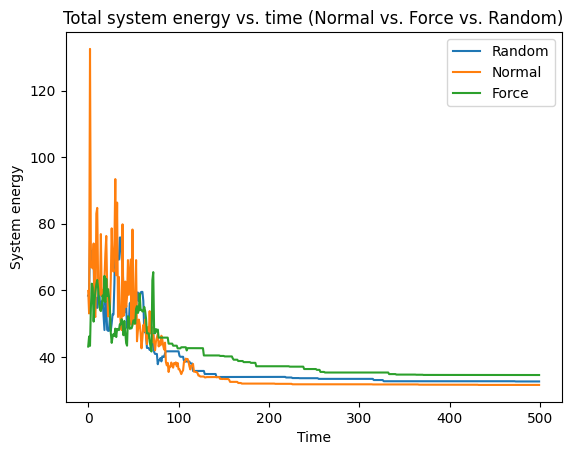

Total System Energy 6.958297039760884
Total System Forces [[-0.02081185  0.02765201 -0.0149048  -0.08419    -0.00826706]
 [-0.08472706  0.00299056  0.08976647  0.04761951 -0.02753364]
 [-0.00161378 -0.00023419 -0.01838446 -0.00712991  0.00323483]
 [ 0.02827213  0.033959    0.01491278 -0.02131307  0.07986631]
 [-0.0069832  -0.0074471   0.07157293 -0.02962133 -0.02557774]
 [ 0.01364584 -0.00673846  0.05634568 -0.02632535  0.02779065]
 [ 0.01045705  0.02452173 -0.04329724 -0.07657319 -0.0422178 ]
 [-0.00270643 -0.01887022 -0.01873039  0.07252691  0.0333096 ]
 [ 0.08420151 -0.03500591  0.03777783  0.0544202   0.06152822]
 [ 0.05877135  0.00623169 -0.05517687  0.05384779 -0.04323536]
 [-0.05529541  0.01469391 -0.07970067  0.01755518  0.04779995]
 [-0.02321016 -0.04175302 -0.04018125 -0.00081675 -0.10669798]]


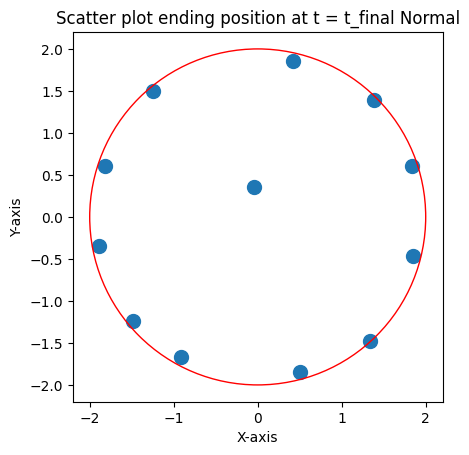

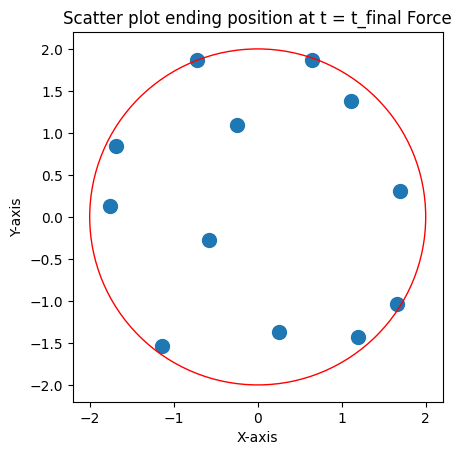

Total System Energy 6.958297039760884
Total System Forces [[-0.02081185  0.02765201 -0.0149048  -0.08419    -0.00826706]
 [-0.08472706  0.00299056  0.08976647  0.04761951 -0.02753364]
 [-0.00161378 -0.00023419 -0.01838446 -0.00712991  0.00323483]
 [ 0.02827213  0.033959    0.01491278 -0.02131307  0.07986631]
 [-0.0069832  -0.0074471   0.07157293 -0.02962133 -0.02557774]
 [ 0.01364584 -0.00673846  0.05634568 -0.02632535  0.02779065]
 [ 0.01045705  0.02452173 -0.04329724 -0.07657319 -0.0422178 ]
 [-0.00270643 -0.01887022 -0.01873039  0.07252691  0.0333096 ]
 [ 0.08420151 -0.03500591  0.03777783  0.0544202   0.06152822]
 [ 0.05877135  0.00623169 -0.05517687  0.05384779 -0.04323536]
 [-0.05529541  0.01469391 -0.07970067  0.01755518  0.04779995]
 [-0.02321016 -0.04175302 -0.04018125 -0.00081675 -0.10669798]]


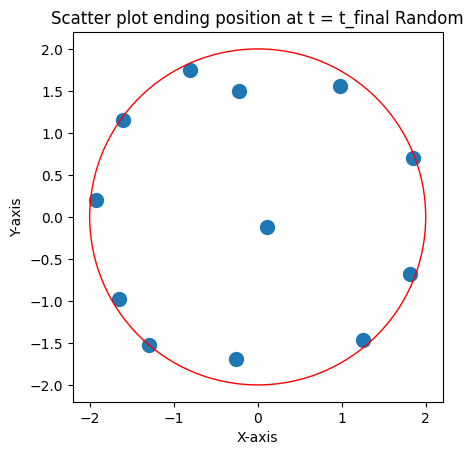

Total System Energy 6.958297039760884
Total System Forces [[-0.02081185  0.02765201 -0.0149048  -0.08419    -0.00826706]
 [-0.08472706  0.00299056  0.08976647  0.04761951 -0.02753364]
 [-0.00161378 -0.00023419 -0.01838446 -0.00712991  0.00323483]
 [ 0.02827213  0.033959    0.01491278 -0.02131307  0.07986631]
 [-0.0069832  -0.0074471   0.07157293 -0.02962133 -0.02557774]
 [ 0.01364584 -0.00673846  0.05634568 -0.02632535  0.02779065]
 [ 0.01045705  0.02452173 -0.04329724 -0.07657319 -0.0422178 ]
 [-0.00270643 -0.01887022 -0.01873039  0.07252691  0.0333096 ]
 [ 0.08420151 -0.03500591  0.03777783  0.0544202   0.06152822]
 [ 0.05877135  0.00623169 -0.05517687  0.05384779 -0.04323536]
 [-0.05529541  0.01469391 -0.07970067  0.01755518  0.04779995]
 [-0.02321016 -0.04175302 -0.04018125 -0.00081675 -0.10669798]]


In [261]:

plt.plot(energy_over_time_data_random, label= 'Random')
plt.plot(energy_over_time_data_normal, label='Normal')
plt.plot(energy_over_time_data_force, label='Force')
plt.legend()
plt.title('Total system energy vs. time (Normal vs. Force vs. Random)')
plt.xlabel('Time')
plt.ylabel('System energy')
plt.show()


x_coordinates = run_postions_result_normal[:, 0]  # Extract all x-coordinates
y_coordinates = run_postions_result_normal[:, 1]  # Extract all y-coordinates

# Create the figure and axis
fig, ax = plt.subplots()

# Scatter plot
ax.scatter(x_coordinates, y_coordinates, s=100)

# Create a circle patch with the same radius as used for the position generation
circle = patches.Circle((0, 0), radius, fill=False, edgecolor='r', linestyle='-')
ax.add_patch(circle)

# Set aspect of the plot to be equal, so the circle isn't skewed
ax.set_aspect('equal', adjustable='box')

# Setting labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'Scatter plot ending position at t = t_final Normal')

# Show the plot
print('Total System Energy', get_energy_total_system(test_data))
print('Total System Forces', get_total_force_on_each_particle(test_data))

x_coordinates = run_postions_result_force[:, 0]  # Extract all x-coordinates
y_coordinates = run_postions_result_force[:, 1]  # Extract all y-coordinates

# Create the figure and axis
fig, ax = plt.subplots()

# Scatter plot
ax.scatter(x_coordinates, y_coordinates, s=100)

# Create a circle patch with the same radius as used for the position generation
circle = patches.Circle((0, 0), radius, fill=False, edgecolor='r', linestyle='-')
ax.add_patch(circle)

# Set aspect of the plot to be equal, so the circle isn't skewed
ax.set_aspect('equal', adjustable='box')

# Setting labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'Scatter plot ending position at t = t_final Force')


# Show the plot
plt.show()
print('Total System Energy', get_energy_total_system(test_data))
print('Total System Forces', get_total_force_on_each_particle(test_data))



x_coordinates = run_postions_result_random[:, 0]  # Extract all x-coordinates
y_coordinates = run_postions_result_random[:, 1]  # Extract all y-coordinates

# Create the figure and axis
fig, ax = plt.subplots()

# Scatter plot
ax.scatter(x_coordinates, y_coordinates, s=100)

# Create a circle patch with the same radius as used for the position generation
circle = patches.Circle((0, 0), radius, fill=False, edgecolor='r', linestyle='-')
ax.add_patch(circle)

# Set aspect of the plot to be equal, so the circle isn't skewed
ax.set_aspect('equal', adjustable='box')

# Setting labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'Scatter plot ending position at t = t_final Random')


# Show the plot
plt.show()
print('Total System Energy', get_energy_total_system(test_data))
print('Total System Forces', get_total_force_on_each_particle(test_data))

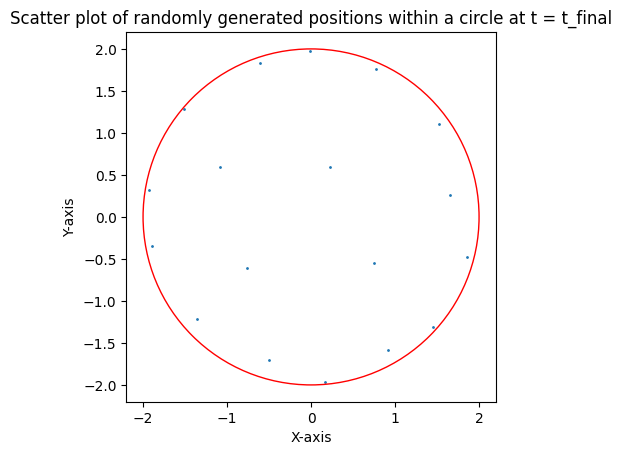

Total System Energy 6.958297039760884
Total System Forces [[-0.02081185  0.02765201 -0.0149048  -0.08419    -0.00826706]
 [-0.08472706  0.00299056  0.08976647  0.04761951 -0.02753364]
 [-0.00161378 -0.00023419 -0.01838446 -0.00712991  0.00323483]
 [ 0.02827213  0.033959    0.01491278 -0.02131307  0.07986631]
 [-0.0069832  -0.0074471   0.07157293 -0.02962133 -0.02557774]
 [ 0.01364584 -0.00673846  0.05634568 -0.02632535  0.02779065]
 [ 0.01045705  0.02452173 -0.04329724 -0.07657319 -0.0422178 ]
 [-0.00270643 -0.01887022 -0.01873039  0.07252691  0.0333096 ]
 [ 0.08420151 -0.03500591  0.03777783  0.0544202   0.06152822]
 [ 0.05877135  0.00623169 -0.05517687  0.05384779 -0.04323536]
 [-0.05529541  0.01469391 -0.07970067  0.01755518  0.04779995]
 [-0.02321016 -0.04175302 -0.04018125 -0.00081675 -0.10669798]]


In [262]:
x_coordinates = run_postions_result[:, 0]  # Extract all x-coordinates
y_coordinates = run_postions_result[:, 1]  # Extract all y-coordinates

# Create the figure and axis
fig, ax = plt.subplots()

# Scatter plot
ax.scatter(x_coordinates, y_coordinates, s=1)

# Create a circle patch with the same radius as used for the position generation
circle = patches.Circle((0, 0), 2, fill=False, edgecolor='r', linestyle='-')
ax.add_patch(circle)

# Set aspect of the plot to be equal, so the circle isn't skewed
ax.set_aspect('equal', adjustable='box')

# Setting labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'Scatter plot of randomly generated positions within a circle at t = t_final')

# Show the plot
plt.show()
print('Total System Energy', get_energy_total_system(test_data))
print('Total System Forces', get_total_force_on_each_particle(test_data))